In [13]:
import numpy as np 
import pandas as pd

import matplotlib as plt
%matplotlib inline
import seaborn as sns;sns.set()
 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

#### load iris data

In [6]:
iris = sns.load_dataset("iris")

#### Inspect how each classes distribute differently in terms of features

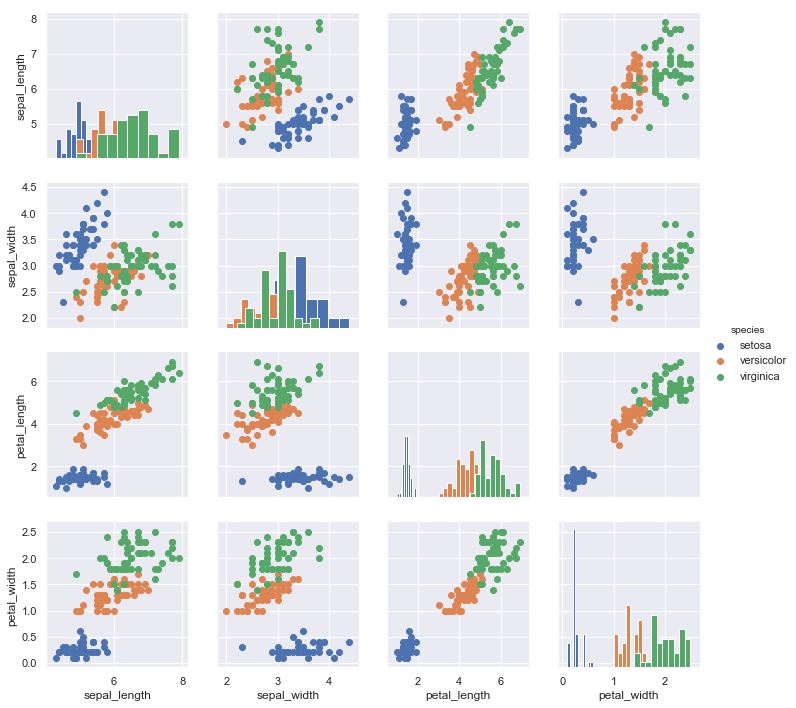

In [7]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.pyplot.hist)
g.map_offdiag(plt.pyplot.scatter)
g.add_legend()

#### train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1],
                                                    iris.iloc[:, -1],
                                                    test_size=.2,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


#### Knn model

In [9]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print([knn.score(X_train, y_train),
     knn.score(X_test, y_test)])

[0.95, 0.9666666666666667]


#### Find best K with CV 
- search the best K from 1 - 20

In [21]:
search_lst = list(range(1, 20))
cv_scores = []

# perform 5-fold cv for each k 
for k in search_lst:
    knn = knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
# find the k that results in highest accuracy
k = search_lst[cv_scores.index(max(cv_scores))]
print(k)

12


#### Implement knn

In [41]:
def predict(x_test, k):
    distance_lst = []
    n_target_lst = []
    for i in range(X_train.shape[0]):
        distance = np.sqrt(np.sum(np.square(x_test - X_train.iloc[i,:])))
        distance_lst.append((distance, i))

    # get k-smallest distances
    distance_lst = sorted(distance_lst)

    for i in range(k):
        n_target_lst.append(y_train[distance_lst[i][1]])

    print(n_target_lst)
    return max(set(n_target_lst), key=n_target_lst.count)
 

In [40]:
predict(X_test.iloc[1,:],5)


TypeError: predict() takes 1 positional argument but 2 were given

In [38]:
X_test.apply(predict_with_k(5), axis = 1)

KeyError: (107, 'occurred at index 114')